# K NEAREST NEIGHBOURS

In [379]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing

In [380]:
os.chdir("C:\\Users\\Archana\\Desktop\\datasets")

In [381]:
data=pd.read_csv('cancer.csv')
data.shape

(569, 32)

In [382]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [383]:
from sklearn import preprocessing

In [384]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [385]:
data['diagnosis'].value_counts()#patients with b are more compared to m

B    357
M    212
Name: diagnosis, dtype: int64

In [386]:
data['diagnosis'].replace(['M','B'],['malignant','benign'],inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [387]:
data.iloc[:,1:]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,malignant,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,malignant,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,malignant,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,malignant,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,malignant,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,malignant,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,malignant,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,malignant,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,malignant,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [388]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [389]:
features=data.iloc[:,2:]
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [390]:
labels=data.iloc[:,1]
labels.head()

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
Name: diagnosis, dtype: object

In [391]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [392]:
data["diagnosis"].replace(['malignant','benign'],[1,0],inplace=True)

In [393]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(features).transform(features)

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [394]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.3)

In [395]:
x_train.shape

(398, 30)

In [396]:
x_test.shape

(171, 30)

In [397]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
461,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.68330,0.26250,0.2641,0.07427
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.10500,0.08586,0.2346,0.08025
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
436,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,14.45,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735


In [398]:
x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.32,17.76,109.8,928.2,0.1354,0.1361,0.1947,0.1357,0.2300,0.07230
25,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,22.25,21.40,152.4,1461.0,0.1545,0.3949,0.3853,0.2550,0.4066,0.10590
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,16.01,28.48,103.9,783.6,0.1216,0.1388,0.1700,0.1017,0.2369,0.06599
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.5,1239.0,0.1381,0.3420,0.3508,0.1939,0.2928,0.07867
230,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325,...,19.59,24.89,133.5,1189.0,0.1703,0.3934,0.5018,0.2543,0.3109,0.09061


In [399]:
y_train=y_train.astype("int")
y_train.head()

461    1
283    1
51     0
559    0
436    0
Name: diagnosis, dtype: int32

In [400]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [401]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [402]:
y_test.head()

508    0
25     1
495    0
201    1
230    1
Name: diagnosis, dtype: object

In [403]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [404]:
y_test=y_test.astype('int')

In [405]:
accuracy_score(y_test,y_pred)

0.9415204678362573

In [406]:
recall_score(y_test,y_pred)

0.9655172413793104

In [407]:
roc_auc_score(y_test,y_pred)

0.9473603906011596

In [408]:
confusion_matrix(y_test,y_pred)

array([[105,   8],
       [  2,  56]], dtype=int64)

In [409]:
features=data.iloc[:,2:6]
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


In [410]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [411]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [412]:
y_test=y_test.astype('int')

In [413]:
accuracy_score(y_test,y_pred)

0.9415204678362573

In [414]:
recall_score(y_test,y_pred)

0.9655172413793104

In [415]:
roc_auc_score(y_test,y_pred)

0.9473603906011596

In [416]:
confusion_matrix(y_test,y_pred)

array([[105,   8],
       [  2,  56]], dtype=int64)

In [417]:
features=data.iloc[:,7:11]
features.head()

,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,0.27760,0.3001,0.14710,0.2419
1,0.07864,0.0869,0.07017,0.1812
2,0.15990,0.1974,0.12790,0.2069
3,0.28390,0.2414,0.10520,0.2597
4,0.13280,0.1980,0.10430,0.1809


In [418]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [419]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [420]:
y_test=y_test.astype('int')

In [421]:
accuracy_score(y_test,y_pred)

0.9415204678362573

In [422]:
recall_score(y_test,y_pred)

0.9655172413793104

In [423]:
roc_auc_score(y_test,y_pred)

0.9473603906011596

In [424]:
confusion_matrix(y_test,y_pred)

array([[105,   8],
       [  2,  56]], dtype=int64)

In [425]:
features=data.iloc[:,11:17]
features.head()

,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
0,0.07871,1.0950,0.9053,8.589,153.40,0.006399
1,0.05667,0.5435,0.7339,3.398,74.08,0.005225
2,0.05999,0.7456,0.7869,4.585,94.03,0.006150
3,0.09744,0.4956,1.1560,3.445,27.23,0.009110
4,0.05883,0.7572,0.7813,5.438,94.44,0.011490


In [426]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [427]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [428]:
accuracy_score(y_test,y_pred)

0.9415204678362573

In [429]:
recall_score(y_test,y_pred)

0.9655172413793104

In [430]:
roc_auc_score(y_test,y_pred)

0.9473603906011596

In [431]:
confusion_matrix(y_test,y_pred)

array([[105,   8],
       [  2,  56]], dtype=int64)

In [432]:
proba=clf.predict_proba(x_test)

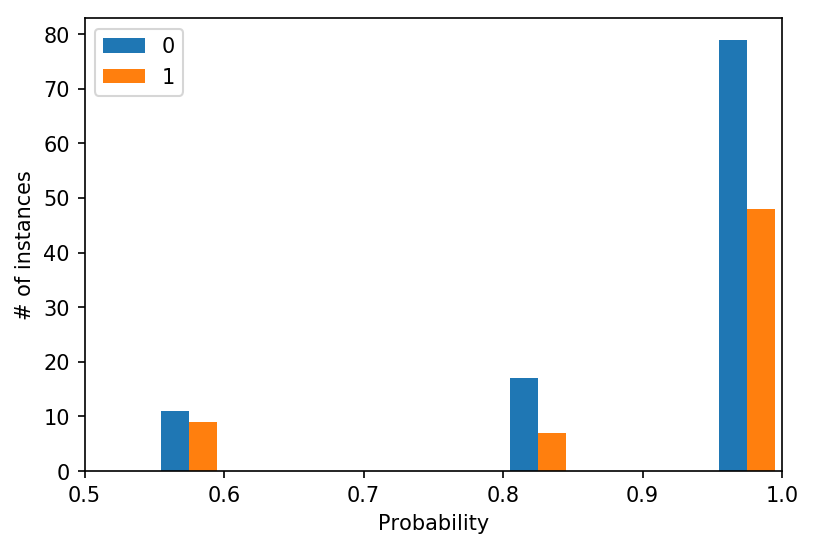

In [433]:
plt.figure(dpi=150)
plt.hist(proba,bins=20)
plt.xlabel('Probability')
plt.ylabel("# of instances")
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [434]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.transform(x_test)

In [435]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [436]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)

In [437]:
clf_acc

array([0.94776119, 0.97727273, 0.97727273])

In [438]:
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1]

# LOGISTIC  REGRESSION

In [439]:
from sklearn.linear_model import LogisticRegression

In [440]:
lr=LogisticRegression()

In [441]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [442]:
lr.score(x_train,y_train)

0.9522613065326633

In [443]:
lr_acc=cross_val_score(lr,x_train,y_train,cv=3,scoring='accuracy',n_jobs=1)

In [444]:
lr_acc

array([0.93283582, 0.90909091, 0.93939394])

In [445]:
y_predict=lr.predict(x_test)

In [446]:
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]

In [447]:
accuracy_score(y_test,y_predict)

0.9649122807017544

In [448]:
confusion_matrix(y_test,y_predict)

array([[107,   6],
       [  0,  58]], dtype=int64)

# SVM

In [449]:
from sklearn.svm import SVC

In [450]:
sv=SVC(kernel='rbf',probability=True)
sv_classifier=sv.fit(x_train,y_train)
sv.score(x_train,y_train)

1.0

In [451]:
sv_acc=cross_val_score(sv_classifier,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)

In [452]:
sv_acc

array([0.94029851, 0.93939394, 0.9469697 ])

In [453]:
svm_proba=cross_val_predict(sv_classifier,x_train_std,y_train,cv=3,method='predict_proba')
svm_scores=svm_proba[:,1]

# Decision Tress

In [454]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [455]:
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
dtc_clf_acc

array([0.93283582, 0.9469697 , 0.91666667])

In [456]:
dtc_proba=cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')
dtc_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [457]:
dtc_clf_scores=dtc_proba[:,1]

In [458]:
y_predict=dtc_clf.predict(x_test)

In [459]:
accuracy_score(y_test,y_predict)


0.8713450292397661

In [460]:
recall_score(y_test,y_predict)

0.9137931034482759

In [461]:
roc_auc_score(y_test,y_predict)

0.8816753127860848

In [462]:
confusion_matrix(y_test,y_predict)

array([[96, 17],
       [ 5, 53]], dtype=int64)

# Random Forest

In [463]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)

In [464]:
rmf_clf=rmf.fit(x_train,y_train)

In [465]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
rmf_clf_acc

array([0.94776119, 0.93939394, 0.93939394])

In [466]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')
rmf_scores=rmf_proba[:,1]

In [467]:
rmf_clf_scores=rmf_proba[:,1]

In [468]:
y_predict=rmf_clf.predict(x_test)

In [469]:
accuracy_score(y_test,y_predict)

0.9415204678362573

In [470]:
recall_score(y_test,y_predict)

0.9482758620689655

In [471]:
roc_auc_score(y_test,y_predict)

0.9431644797070492

In [472]:
confusion_matrix(y_test,y_predict)

array([[106,   7],
       [  3,  55]], dtype=int64)

# Boosting

In [477]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    # calculate the ROC curve
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive rate',fontsize=16)
    plt.ylabel('True Positive  Rate',fontsize=16)
    plt.title('ROC_Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC score(kNN):0.980107


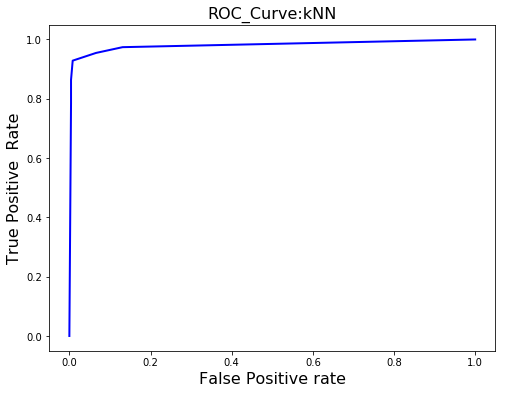

AUC score(Logistic Regression):0.991005


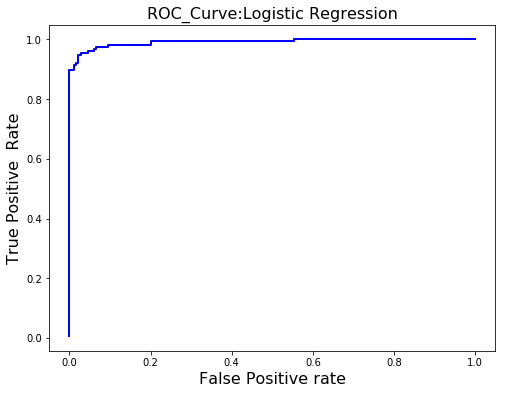

AUC score(Support Vector Classification):0.988317


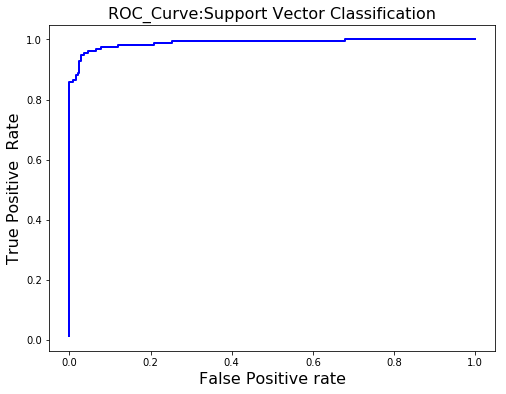

AUC score(Decision trees):0.938844


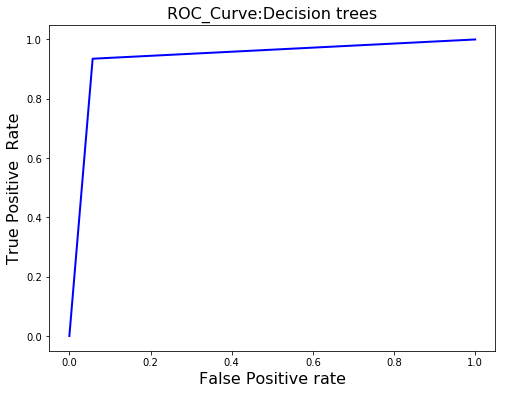

AUC score(Random Forest):0.983979


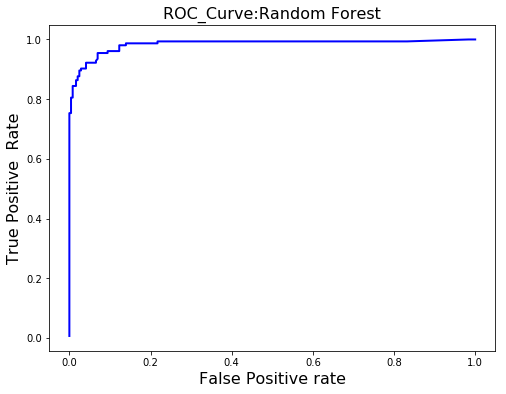

In [479]:
ROC_curve('kNN',y_train,clf_scores)
ROC_curve('Logistic Regression',y_train,lr_scores)
ROC_curve('Support Vector Classification',y_train,svm_scores)
ROC_curve('Decision trees',y_train,dtc_clf_scores)
ROC_curve('Random Forest',y_train,rmf_scores)
